In [10]:
#Everything in keras is a layer or something that is related to layer
#A layer is an object that encapsulates weights and some computation(#forward pass)
#weights are defined in a build() and computation are defined in a call()

from tensorflow import keras
import tensorflow as tf
class SimpleDense(keras.layers.Layer):
    def __init__(self, units, activation= None):
        super().__init__()
        self.units=units
        self.activation=activation
    
    #weight creation takes place in the build() method.
    def build(self, input_shape) :
        input_dim= input_shape[-1]
        #add_weights is an shorcut method for creating weights
        self.W=self.add_weight(shape=(input_dim,self.units),initializer="random_normal")
        self.b=self.add_weight(shape=(self.units,),initializer="zeros"
        )
    # we define the forward pass computation in the call method()
    def call(self,inputs):
        y=tf.matmul(inputs,self.W) + self.b
        if self.activation is not None:
            y=self.activation(y)
        return y

my_dense= SimpleDense(units=32,activation=tf.nn.relu) # instantiate our layer, defined previously.
input_tensor= tf.ones(shape=(2,784)) # create some test inputs.
output_tensor=my_dense(input_tensor) # call the layer on the inputs just like a function.
print(output_tensor.shape)

(2, 32)


In [17]:
from tensorflow.keras import layers
#A dense layer with 32 output units
layer=layers.Dense(32,activation="relu")
layer

<Dense name=dense_3, built=False>

In [22]:
from tensorflow.keras import models
from tensorflow.keras import layers

models=models.Sequential([layers.Dense(32,activation="relu"),
                          layers.Dense(32)])

In [ ]:
from tensorflow import keras
#define alinera classifier
model= keras.Sequential([keras.layers.Dense(1)])
model.compile(optimizer="rmsprop",loss="mean_squared_error",metrics=["accuracy"])
model

In [ ]:
#The fit method implements the training loop itself
#1.The Data(inputs and targets)to train on.It is typically passed either in the form of numpy arrays and tensorflow datasets object.
#2.The no of epochs to train for:how many times the training loop should iterate over the data passed.
#3.The batch size to use within epochs of mini-batch gardient descent
import numpy as np;
num_samples_per_class=200
#The multivariate normal, multinormal is a generalization of the one-dimensionalnormal distribution to  higher dimensions.
negative_samples=np.random.multivariate_normal(
    mean=[0,3],
    cov=[[1,0.5],[0.5,1]],
    size=num_samples_per_class
)
positive_samples=np.random.multivariate_normal(
    mean=[3,0],
    cov=[[1,0.5],[0.5,1]],
    size=num_samples_per_class
)
inputs=np.vstack((negative_samples,positive_samples)).astype(np.float32)
# Create the targets (0 for negative samples, 1 for positive samples)
targets = np.vstack((
    np.zeros((num_samples_per_class, 1), dtype="float32"),  # Class 0 (negative)
    np.ones((num_samples_per_class, 1), dtype="float32")    # Class 1 (positive)
))
history = model.fit(inputs, targets,epochs=5,batch_size=128)
history.history

In [ ]:
# This code is using a tool called Keras, which helps us create a machine learning model. 
# A model is like a very smart machine that learns from data and can make predictions based on what it learned.


# Here we are creating a very simple model. Think of the model as a brain that learns from examples. 
# It has one layer (a "Dense" layer) with 1 unit. You can think of a layer like a small part of the brain that helps it learn. 
# Since there’s only 1 unit, this brain is really simple and is likely used for making a decision between two things (like yes/no or true/false).
model=keras.Sequential([keras.layers.Dense(1)])

#When we compile the model, we’re telling it how to learn and how to measure how well it’s learning:

#Optimizer (RMSprop): This is like the brain's thinking process. It tells the model how to adjust itself to learn better.
#The learning rate (0.1) controls how fast it should learn.

#Loss (MeanSquaredError): This measures how wrong the model's predictions are during learning. 
# The goal is to make the error as small as possible.

#Metrics-BinaryAccuracy:This checks how many times the model's predictions are correct for two possible answers(like yes/no or 0/1).
model.compile(optimizer=keras.optimizers.RMSprop(learning_rate=0.1),
              loss=keras.losses.MeanSquaredError(),
              metrics=[keras.metrics.BinaryAccuracy()])
#Before we teach the model, we want to mix (shuffle) the examples so that it doesn't learn them in a specific order.
#Think of it like mixing flashcards before studying so you don’t memorize the order of answers.
#np.random.permutation(len(inputs)): This shuffles the order of the data.
#inputs are the examples we give to the model (like questions).
#targets are the correct answers to those examples (like the answers to the questions).

indices_permutations= np.random.permutation(len(inputs))
shuffled_inputs= inputs[indices_permutations]
shuffled_targets=targets[indices_permutations]

#We split the data into two parts:

#Training data (70% of examples): This is the data we use to teach the model.
#Validation data (30% of examples): This is used to check how well the model is learning, but we don’t use it for teaching.
num_validation_samples= int (0.3 * len(inputs))
val_inputs=shuffled_inputs[:num_validation_samples]
val_targets=shuffled_targets[:num_validation_samples]
training_inputs= shuffled_inputs[num_validation_samples:]
training_targets=shuffled_targets[num_validation_samples:]
#Now, we’re actually teaching the model using the training data.

#Epochs (5): This means the model will go through the entire training data 5 times to learn better.
#Batch size (16): This means the model will look at 16 examples at a time while learning.
#Validation data: While the model is learning, it checks its progress using the validation data to see how well it's doing.

model.fit(
    training_inputs,
    training_targets,
    epochs=5,
    batch_size=16,
    validation_data=(val_inputs,val_targets)
)


In [3]:
from tensorflow.keras.datasets import imdb
(train_data,train_labels),(test_data,test_labels)= imdb.load_data(num_words=10000)
train_data[0]
train_labels[0]
#This finds the highest word index used in the training dataset. Since you limited the vocabulary to the top 10,000 words, 
# the maximum index will be 9999 (because indices start from 0).
max([max(sequence) for sequence in train_data])
word_index= imdb.get_word_index()
#This function returns a dictionary mapping words to integer indices
#For example, word_index['the'] might return 1, meaning "the" is the most frequent word in the dataset.
reverse_word_index = dict([(value,key) for (key,value) in word_index.items()])
#This creates a reverse dictionary, reverse_word_index, where the keys are the integer indices and the values are the corresponding
# words. This will be useful for decoding the review from integers back to words.
decoded_review="" .join([reverse_word_index.get(i-3,"?") for i in train_data[0]])

1

In [30]:
import numpy as np
#A list of sequences where each sequence is a list of integers (each integer represents a word index).
#dimension: The size of the output vector. In this case, it's 10000 because we limited the vocabulary size to 10,000 words 
# when loading the IMDb dataset.
def vectorize_sequences(sequences,dimension=10000):
    results=np.zeros((len(sequences),dimension))
    for i , sequence in enumerate(sequences):
        for j in sequence:
            results[i,j]= 1
    return results
x_train =vectorize_sequences(train_data)
x_test=vectorize_sequences(test_data)

y_train=np.asarray(train_labels).astype("float32")
y_test=np.asarray(test_labels).astype("float32")

In [51]:
from tensorflow import keras
from tensorflow.keras import layers
model=keras.Sequential([layers.Dense(16,activation="relu"),
                        layers.Dense(16,activation="relu"),
                        layers.Dense(1,activation="sigmoid")])
model= keras.Sequential([keras.layers.Dense(1)])
model.compile(optimizer="rmsprop",loss="mean_squared_error",metrics=["accuracy"])

x_val=x_train[:10000]
partial_x_train= x_train[10000:]
y_val=y_train[:10000]
partial_y_train=y_train[10000:]

history=model.fit(partial_x_train,
                  partial_y_train,
                  epochs=20,
                  batch_size=512,
                  validation_data=(x_val,y_val))
history_dict =history.history
history_dict.keys()
[u"accuracy",u"loss",u"val_accuracy",u"val_loss"]


Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.5885 - loss: 0.2845 - val_accuracy: 0.7829 - val_loss: 0.1558
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8342 - loss: 0.1341 - val_accuracy: 0.8428 - val_loss: 0.1299
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8886 - loss: 0.1080 - val_accuracy: 0.8565 - val_loss: 0.1239
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9118 - loss: 0.0935 - val_accuracy: 0.8605 - val_loss: 0.1257
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9231 - loss: 0.0855 - val_accuracy: 0.8559 - val_loss: 0.1268
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9304 - loss: 0.0805 - val_accuracy: 0.8622 - val_loss: 0.1270
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9415 - loss: 0.0759 - val_accuracy: 0.8653 - val_loss: 0.1239
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9456 - loss: 0.0717 - val_accuracy: 0.8612 - val_loss

['accuracy', 'loss', 'val_accuracy', 'val_loss']

In [ ]:
import matplotlib.pyplot as plt
history_dict =history.history
loss_values=history_dict["loss"]
val_loss_value=history_dict["val_loss"]
epochs= range(1,len(loss_values)+1)
plt.plot(epochs,loss_values,"bo",label="Training loss")
plt.plot(epochs,val_loss_value,"b",label="Validation Loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [ ]:
#Loss Function 
#categorical_crossentropy - It measures the distance between two probability distributions,between the probability distribution
# output by the model and the true distribution of the labels.By minimizing the distance between these two distributions , you
# train the model to input something as close as possible to the true label .

#Information bottleneck:
#If one layer drops some information relevant to the classification problem , this information can never be recovered by later 
# layers:each layer can pottentially become an information bottleneck.



Epoch 1/5


/Users/divyaravi/Library/Python/3.9/lib/python/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8076 - loss: 0.7297
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9119 - loss: 0.3179
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9180 - loss: 0.2868
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9264 - loss: 0.2679
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9248 - loss: 0.2691
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9131 - loss: 0.3048
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 616us/step


Text(95.72222222222221, 0.5, 'Truth')

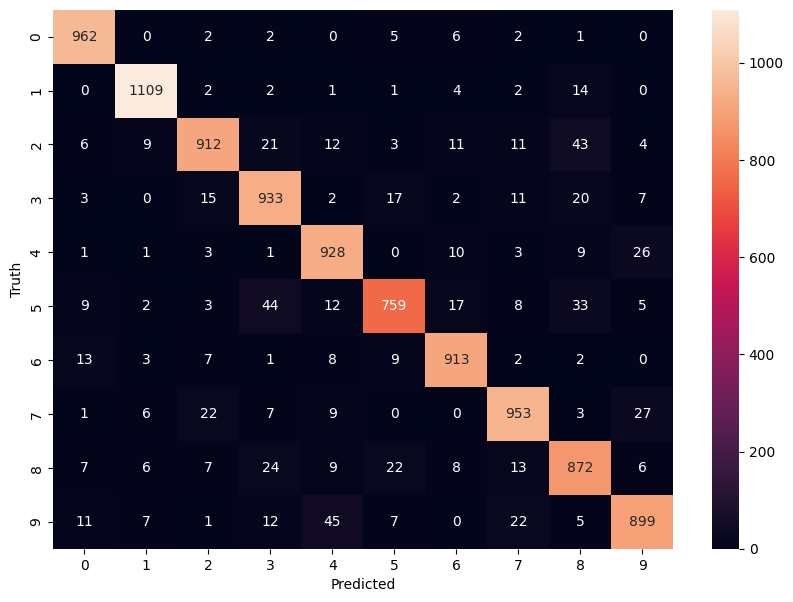

In [30]:
import tensorflow as tf
from tensorflow import keras 
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

(x_train,y_train),(x_test,y_test) = keras.datasets.mnist.load_data()
x_train_flattened=x_train.reshape(len(x_train), 28*28)
x_test_flattened=x_test.reshape(len(x_test), 28*28)

x_train_flattened= x_train_flattened/255.0
x_test_flattened= x_test_flattened/255.0

model= keras.Sequential([
    keras.layers.Dense(10,input_shape=(784,),activation='sigmoid')
])
model.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy",
              metrics=['accuracy'])
model.fit(x_train_flattened,y_train,epochs=5)
model.evaluate(x_test_flattened,y_test)
y_predicted=model.predict(x_test_flattened)
y_predicted_labels= [np.argmax(i) for i in y_predicted]
y_predicted_labels[:5] #first 5 
y_test[:5]
cm=tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels) #to evaluate performance
cm

import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [ ]:

model= keras.Sequential([
    keras.layers.Dense(128,input_shape=(784,),activation='relu'),
    keras.layers.Dense(64,activation='relu'),
    keras.layers.Dense(10,activation='softmax')
])
model.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy",
              metrics=['accuracy'])
model.fit(x_train_flattened,y_train,epochs=5)
model.evaluate(x_test_flattened,y_test)
y_predicted=model.predict(x_test_flattened)
y_predicted_labels= [np.argmax(i) for i in y_predicted]
y_predicted_labels[:5] #first 5 
y_test[:5]
cm=tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels) #to evaluate performance
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
